<a href="https://colab.research.google.com/github/PaoDeVi/T-picos-IA/blob/main/CNN_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets,utils,layers,optimizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
#Datos
NUM_CLASSES = 10

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

170498071/170498071 [==============================] - 3s 0us/step


###PRIMER MODELO

In [ ]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

output_layer = layers.Dense(units = NUM_CLASSES, activation='softmax')(x)

model = Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16, 16, 64)        0     

In [ ]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=20,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/20
625/625 [==============================] - 92s 144ms/step - loss: 1.6745 - accuracy: 0.4026 - val_loss: 1.3845 - val_accuracy: 0.5243
Epoch 2/20
625/625 [==============================] - 88s 141ms/step - loss: 1.3589 - accuracy: 0.5167 - val_loss: 1.2304 - val_accuracy: 0.5738
Epoch 3/20
625/625 [==============================] - 92s 147ms/step - loss: 1.2134 - accuracy: 0.5730 - val_loss: 1.1267 - val_accuracy: 0.6024
Epoch 4/20
625/625 [==============================] - 87s 139ms/step - loss: 1.1152 - accuracy: 0.6066 - val_loss: 1.0798 - val_accuracy: 0.6195
Epoch 5/20
625/625 [==============================] - 94s 151ms/step - loss: 1.0388 - accuracy: 0.6347 - val_loss: 1.0123 - val_accuracy: 0.6460
Epoch 6/20
625/625 [==============================] - 91s 146ms/step - loss: 0.9799 - accuracy: 0.6553 - val_loss: 1.0048 - val_accuracy: 0.6453
Epoch 7/20
625/625 [==============================] - 88s 140ms/step - loss: 0.9418 - accuracy: 0.6705 - val_loss: 1.0126 - val_ac

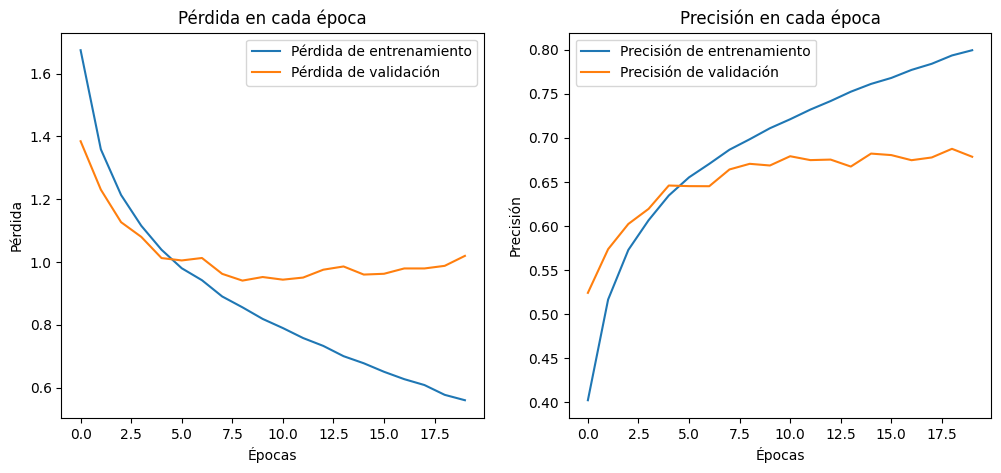

In [ ]:
# Gráfico de pérdida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['loss'], label='Pérdida de entrenamiento')
ax1.plot(history.history['val_loss'], label='Pérdida de validación')
ax1.set_title('Pérdida en cada época')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Pérdida')
ax1.legend()

# Gráfico de precisión
ax2.plot(history.history['accuracy'], label='Precisión de entrenamiento')
ax2.plot(history.history['val_accuracy'], label='Precisión de validación')
ax2.set_title('Precisión en cada época')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Precisión')
ax2.legend()

plt.show()

###SEGUNDO MODELO

In [ ]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

output_layer = layers.Dense(units = NUM_CLASSES, activation='softmax')(x)

model = Model(input_layer, output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 16, 16, 64)        0   

In [ ]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=20,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/20
625/625 [==============================] - 101s 158ms/step - loss: 1.6621 - accuracy: 0.4003 - val_loss: 1.3813 - val_accuracy: 0.5106
Epoch 2/20
625/625 [==============================] - 103s 166ms/step - loss: 1.3339 - accuracy: 0.5239 - val_loss: 1.2404 - val_accuracy: 0.5537
Epoch 3/20
625/625 [==============================] - 101s 162ms/step - loss: 1.1900 - accuracy: 0.5777 - val_loss: 1.1311 - val_accuracy: 0.6013
Epoch 4/20
625/625 [==============================] - 100s 160ms/step - loss: 1.0860 - accuracy: 0.6129 - val_loss: 1.0751 - val_accuracy: 0.6181
Epoch 5/20
625/625 [==============================] - 125s 200ms/step - loss: 0.9988 - accuracy: 0.6494 - val_loss: 1.0103 - val_accuracy: 0.6440
Epoch 6/20
625/625 [==============================] - 99s 159ms/step - loss: 0.9318 - accuracy: 0.6709 - val_loss: 0.9464 - val_accuracy: 0.6645
Epoch 7/20
625/625 [==============================] - 105s 168ms/step - loss: 0.8811 - accuracy: 0.6916 - val_loss: 0.9117 - 

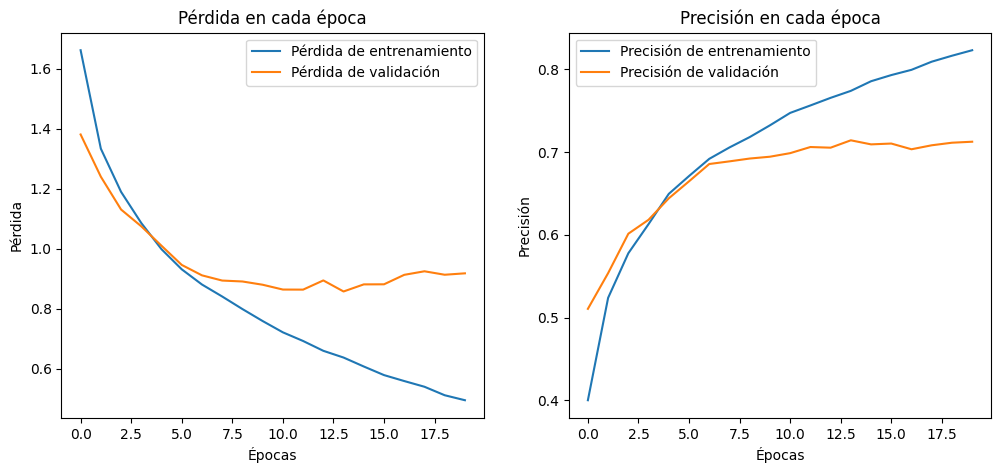

In [ ]:
# Gráfico de pérdida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['loss'], label='Pérdida de entrenamiento')
ax1.plot(history.history['val_loss'], label='Pérdida de validación')
ax1.set_title('Pérdida en cada época')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Pérdida')
ax1.legend()

# Gráfico de precisión
ax2.plot(history.history['accuracy'], label='Precisión de entrenamiento')
ax2.plot(history.history['val_accuracy'], label='Precisión de validación')
ax2.set_title('Precisión en cada época')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Precisión')
ax2.legend()

plt.show()

313/313 [==============================] - 8s 25ms/step - loss: 0.9464 - accuracy: 0.7094

Precisión en el conjunto de prueba: 0.7093999981880188
313/313 [==============================] - 9s 28ms/step


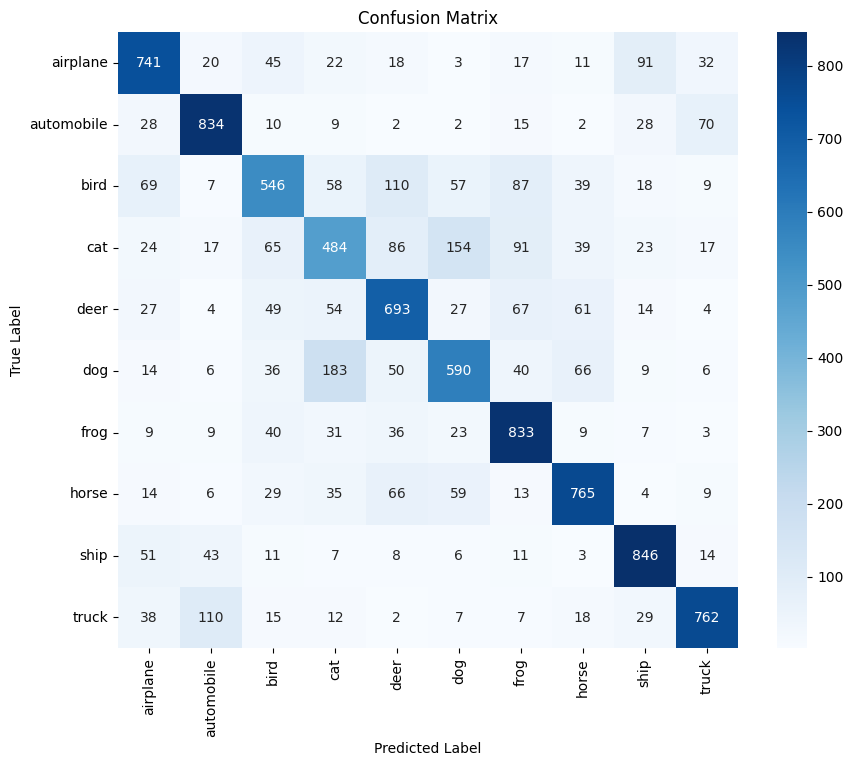

In [ ]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nPrecisión en el conjunto de prueba: {test_acc}')

# Predicciones sobre el conjunto de prueba
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
y_test_flat = np.argmax(y_test, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Calcular la matriz de confusión

cm = confusion_matrix(y_test_flat, predicted_labels)

# Graficar la matriz de confusión
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

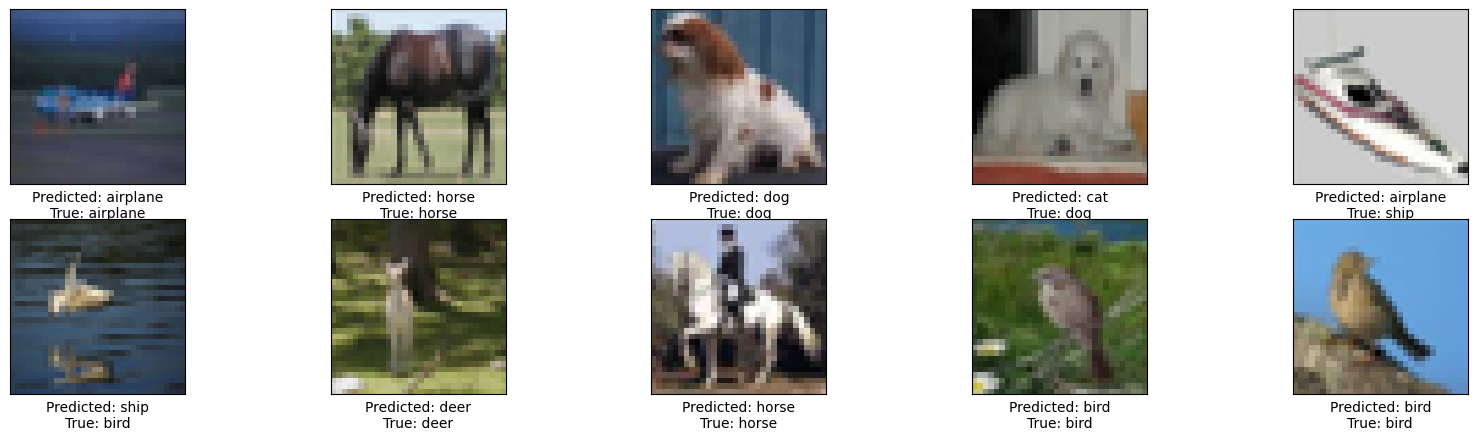

In [ ]:
import random
# Prueba con imágenes individuales
num_images = 10
random_indices = random.sample(range(x_test.shape[0]), num_images)
plt.figure(figsize=(20, 5))

for i, index in enumerate(random_indices):
    img = x_test[index]
    true_label = y_test_flat[index]
    prediction = predicted_labels[index]
    plt.subplot(2, num_images // 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {class_names[prediction]}\nTrue: {class_names[true_label]}")
plt.show()